In [1]:
import pandas as pd
import requests, json

# 設定日期和股票代號
date = '20230901'
stock_no = '2330'

# 構建正確的請求 URL，確保 date 參數正確傳遞
url = requests.get(f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}')

# 解析 JSON 回應
content = url.json()  # 使用 requests 自帶的 .json() 方法

# 提取所需的數據
stock_data = content['data']
col_name = content['fields']

# 將數據轉換為 DataFrame
df = pd.DataFrame(data=stock_data, columns=col_name)


# print(df)

output_data={
    'field': col_name,
    'data' : stock_data
}


file_name = f'stock_data_{stock_no}_{date}.csv'
df.to_csv(file_name,index=False,encoding='utf-8-sig')

print(f'Data saved to {file_name}')

Data saved to stock_data_2330_20230901.csv


In [ ]:
import sqlite3

sql = '''
        CREATE TABLE IF NOT EXIST record (
	日期 TEXT NOT NULL,
	成交筆數 INTEGER,
	開盤價 NUMERIC,
	最高價 NUMERIC,
	最低價 NUMERIC,
	收盤價 NUMERIC
    );
    '''



In [ ]:
import sqlite3
conn = sqlite3.connect("stock_data.db")
with conn:
    sql = '''
            CREATE TABLE IF NOT EXISTS record (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        日期 TEXT UNIQUE,
        開盤價 NUMERIC,
        最高價 NUMERIC,
        最低價 NUMERIC,
        成交筆數 INTEGER,
        收盤價 INTEGER NOT NULL
    );
    '''

    cursor = conn.cursor()
    cursor.execute(sql)




In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf
import sqlite3
import pandas as pd
import numpy as np

start = '2020-01-01'
end = '2024-11-05'
symbol = '2330.TW'

# 下載資料
data = yf.download(symbol, start=start, end=end)

# 連接到 SQLite 資料庫
conn = sqlite3.connect('stockdb.db')
cursor = conn.cursor()

# 建立表格
sql = '''
    CREATE TABLE IF NOT EXISTS stock_prices (
        symbol TEXT,
        date DATE UNIQUE,  
        open REAL,
        high REAL,
        low REAL,
        adj_close REAL,
        volume INTEGER,
        close REAL
    )
'''
cursor.execute(sql)

# 插入資料，確保格式正確
for index, row in data.iterrows():
    # 將 index 轉換為字串格式日期
    date_str = index.strftime('%Y-%m-%d') if isinstance(index, pd.Timestamp) else str(index)
    
    # 檢查每個欄位是否是 NaN，並轉換為 None
    open_price = row['Open'] if pd.notna(row['Open']) else None
    high_price = row['High'] if pd.notna(row['High']) else None
    low_price = row['Low'] if pd.notna(row['Low']) else None
    adj_close_price = row['Adj Close'] if pd.notna(row['Adj Close']) else None
    volume = int(row['Volume']) if pd.notna(row['Volume']) else None
    close_price = row['Close'] if pd.notna(row['Close']) else None

    # 插入資料到 SQLite 資料庫
    cursor.execute('''
        INSERT OR IGNORE INTO stock_prices (symbol, date, open, high, low, adj_close, volume, close)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', (symbol, date_str, open_price, high_price, low_price, adj_close_price, volume, close_price))

# 提交並關閉連線
conn.commit()
cursor.close()
conn.close()

In [13]:
import yfinance as yf

# 設定下載的股票代號與日期範圍
symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data = yf.download(symbol, start=start, end=end)

# 顯示資料前幾行
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close   Close    High     Low    Open  \
Ticker                        2330.TW 2330.TW 2330.TW 2330.TW 2330.TW   
Date                                                                    
2023-01-03 00:00:00+00:00  437.941528   453.0   453.5   443.0   446.0   
2023-01-04 00:00:00+00:00  434.557861   449.5   455.0   448.5   449.5   
2023-01-05 00:00:00+00:00  443.258698   458.5   459.5   455.0   459.0   
2023-01-06 00:00:00+00:00  443.258698   458.5   459.5   455.0   455.0   
2023-01-09 00:00:00+00:00  465.010773   481.0   481.0   467.5   468.0   

Price                        Volume  
Ticker                      2330.TW  
Date                                 
2023-01-03 00:00:00+00:00  14885824  
2023-01-04 00:00:00+00:00  19188422  
2023-01-05 00:00:00+00:00  23549581  
2023-01-06 00:00:00+00:00  20886011  
2023-01-09 00:00:00+00:00  46666263  


In [ ]:
import yfinance as yf
import sqlite3
import pandas as pd

# 設定下載的股票代號與日期範圍
symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data = yf.download(symbol, start=start, end=end)

# 連接到 SQLite 資料庫（如果資料庫不存在，會自動創建）
conn = sqlite3.connect('stocks_data.db')

# 創建資料表
sql = '''
    CREATE TABLE IF NOT EXISTS NewTable (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Date TEXT NOT NULL UNIQUE,
        "Open" NUMERIC,
        High NUMERIC,
        Low NUMERIC,
        "Adj Close" NUMERIC,
        Volume NUMERIC,
        "Close" NUMERIC
    );
'''

# 執行 SQL 指令來創建資料表
conn.execute(sql)

    
    
   
# 提交更改並關閉連接
conn.commit()
cursor.close()
conn.close()

[*********************100%***********************]  1 of 1 completed

2023-01-03 00:00:00+00:00
Price      Ticker 
Adj Close  2330.TW    4.379415e+02
Close      2330.TW    4.530000e+02
High       2330.TW    4.535000e+02
Low        2330.TW    4.430000e+02
Open       2330.TW    4.460000e+02
Volume     2330.TW    1.488582e+07
Name: 2023-01-03 00:00:00+00:00, dtype: float64
2023-01-04 00:00:00+00:00
Price      Ticker 
Adj Close  2330.TW    4.345579e+02
Close      2330.TW    4.495000e+02
High       2330.TW    4.550000e+02
Low        2330.TW    4.485000e+02
Open       2330.TW    4.495000e+02
Volume     2330.TW    1.918842e+07
Name: 2023-01-04 00:00:00+00:00, dtype: float64
2023-01-05 00:00:00+00:00
Price      Ticker 
Adj Close  2330.TW    4.432587e+02
Close      2330.TW    4.585000e+02
High       2330.TW    4.595000e+02
Low        2330.TW    4.550000e+02
Open       2330.TW    4.590000e+02
Volume     2330.TW    2.354958e+07
Name: 2023-01-05 00:00:00+00:00, dtype: float64
2023-01-06 00:00:00+00:00
Price      Ticker 
Adj Close  2330.TW    4.432587e+02
Close      

In [12]:


conn = sqlite3.connect('stock_data.db')
cursor = conn.cursor()
# 遍歷 DataFrame 中的每一行資料
for index, row in data.iterrows():
    # 強制將索引轉換為 datetime 並格式化為字串
    date_str = pd.to_datetime(index).strftime('%Y-%m-%d')
     # 確保所有數值型資料都能正確處理
    insertSQL = """
        INSERT INTO NewTable (Date, "Open", High, Low, "Adj Close", Volume, "Close")
        VALUES (?, ?, ?, ?, ?, ?, ?)
    """
cursor.execute(insertSQL, (date_str, row['Open'], row['High'], row['Low'], row['Adj Close'], row['Volume'], row['Close']))
conn.commit()
cursor.close()
conn.close()


InterfaceError: Error binding parameter 1 - probably unsupported type.

In [ ]:
import yfinance as yf
import sqlite3
import pandas as pd

# 設定下載的股票代號與日期範圍
symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data = yf.download(symbol, start=start, end=end)
yf.download()
# 連接到 SQLite 資料庫（如果資料庫不存在，會自動創建）
conn = sqlite3.connect('stock_data.db')
cursor = conn.cursor()

# 創建資料表
sql = '''
    CREATE TABLE IF NOT EXISTS NewTable (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Date TEXT NOT NULL UNIQUE,
        "Open" NUMERIC,
        High NUMERIC,
        Low NUMERIC,
        "Adj Close" NUMERIC,
        Volume NUMERIC,
        "Close" NUMERIC
    );
'''
# 執行 SQL 指令來創建資料表
conn.execute(sql)
conn.commit()

# 遍歷 DataFrame 中的每一行資料並插入資料庫
for index, row in data.iterrows():
    # 強制將索引轉換為 datetime 並格式化為字串
    date_str = pd.to_datetime(index).strftime('%Y-%m-%d')
    
    # 插入資料
    insertSQL = """
        INSERT OR IGNORE INTO NewTable (Date, "Open", High, Low, "Adj Close", Volume, "Close")
        VALUES (?, ?, ?, ?, ?, ?, ?)
    """
    cursor.execute(insertSQL, (date_str, row['Open'], row['High'], row['Low'], row['Adj Close'], row['Volume'], row['Close']))

# 提交更改並關閉連接
conn.commit()
cursor.close()
conn.close()


[*********************100%***********************]  1 of 1 completed


InterfaceError: Error binding parameter 1 - probably unsupported type.

In [11]:
import yfinance as yf
import sqlite3
import pandas as pd

# 設定下載的股票代號與日期範圍
symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data = yf.download(symbol, start=start, end=end)

# 連接到 SQLite 資料庫（如果資料庫不存在，會自動創建）
conn = sqlite3.connect('stock_data.db')
cursor = conn.cursor()


# 遍歷 DataFrame 中的每一行資料並插入資料庫
for index, row in data.iterrows():
    print(f"Date: {index}\nOpen: {row['Open']}\nHigh: {row['High']}\nLow: {row['Low']}\nAdj close={row['Adj Close']}\nVolume: {row['Volume']}\nClose: {row['Close']}\n")
    
    # 強制將索引轉換為 datetime 並格式化為字串
    
    # 插入資料
    insertSQL = """
        INSERT OR IGNORE INTO NewTable (Date, "Open", High, Low, "Adj Close", Volume ,"Close")
        VALUES (?, ?, ?, ?, ?, ?, ?)
    """
    cursor.execute(insertSQL, (index, row['Open'], row['High'], row['Low'], row['Adj Close'], row['Volume'] ,row['Close']))

# 提交更改並關閉連接
conn.commit()
cursor.close()
conn.close()

[*********************100%***********************]  1 of 1 completed

Date: 2023-01-03 00:00:00+00:00
Open: Ticker
2330.TW    446.0
Name: 2023-01-03 00:00:00+00:00, dtype: float64
High: Ticker
2330.TW    453.5
Name: 2023-01-03 00:00:00+00:00, dtype: float64
Low: Ticker
2330.TW    443.0
Name: 2023-01-03 00:00:00+00:00, dtype: float64
Adj close=Ticker
2330.TW    437.941559
Name: 2023-01-03 00:00:00+00:00, dtype: float64
Volume: Ticker
2330.TW    14885824.0
Name: 2023-01-03 00:00:00+00:00, dtype: float64
Close: Ticker
2330.TW    453.0
Name: 2023-01-03 00:00:00+00:00, dtype: float64



InterfaceError: Error binding parameter 0 - probably unsupported type.

In [21]:
import yfinance as yf
import sqlite3
import pandas as pd

# 設定下載的股票代號與日期範圍
symbol = '2330.TW'
start = '2020-01-01'
end = '2024-11-05'

# 下載資料
data = yf.download(symbol, start=start, end=end)

conn = sqlite3.connect('stock_data.db')
cursor = conn.cursor()
# 遍歷 DataFrame 中的每一行資料並插入資料庫
for index, row in data.iterrows():
    date_str = index.strftime('%Y-%m-%d')
    
    # 從 Series 中提取單一值
    open_price = row['Open'].iloc[0] if pd.notnull(row['Open'].iloc[0]) else None
    high = row['High'].iloc[0] if pd.notnull(row['High'].iloc[0]) else None
    low = row['Low'].iloc[0] if pd.notnull(row['Low'].iloc[0]) else None
    adj_close = row['Adj Close'].iloc[0] if pd.notnull(row['Adj Close'].iloc[0]) else None
    volume = row['Volume'].iloc[0] if pd.notnull(row['Volume'].iloc[0]) else None
    close = row['Close'].iloc[0] if pd.notnull(row['Close'].iloc[0]) else None

    # 插入資料
    insertSQL = """
        INSERT OR IGNORE INTO NewTable (Date, "Open", High, Low, "Adj Close", Volume, "Close", Tickers)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    """
    cursor.execute(insertSQL, (date_str, open_price, high, low, adj_close, volume, close, symbol))

# 提交更改並關閉連接
conn.commit()
cursor.close()
conn.close()

[*********************100%***********************]  1 of 1 completed


In [2]:
import yfinance as yf
import sqlite3
import pandas as pd

# 設定下載的股票代號與日期範圍
symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data = yf.download(symbol, start=start, end=end)


print(type(data))
print('===============')
print(data.index)




[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2023-01-03 00:00:00+00:00', '2023-01-04 00:00:00+00:00',
               '2023-01-05 00:00:00+00:00', '2023-01-06 00:00:00+00:00',
               '2023-01-09 00:00:00+00:00', '2023-01-10 00:00:00+00:00',
               '2023-01-11 00:00:00+00:00', '2023-01-12 00:00:00+00:00',
               '2023-01-13 00:00:00+00:00', '2023-01-16 00:00:00+00:00',
               ...
               '2023-12-18 00:00:00+00:00', '2023-12-19 00:00:00+00:00',
               '2023-12-20 00:00:00+00:00', '2023-12-21 00:00:00+00:00',
               '2023-12-22 00:00:00+00:00', '2023-12-25 00:00:00+00:00',
               '2023-12-26 00:00:00+00:00', '2023-12-27 00:00:00+00:00',
               '2023-12-28 00:00:00+00:00', '2023-12-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=239, freq=None)


In [3]:
import sqlite3

conn = sqlite3.connect('check1.db')
cursor = conn.cursor()

# 建立資料表，如果尚未存在
create_table_sql = """
CREATE TABLE IF NOT EXISTS NewTable (
    Date TEXT PRIMARY KEY,
    "Open" NUMERIC,
    High NUMERIC,
    Low NUMERIC,
    "Adj Close" NUMERICL,
    Volume NUMERIC,
    "Close" NUMERIC,
    Tickers TEXT
);
"""
cursor.execute(create_table_sql)

cursor.close()
conn.close()

In [4]:
import sqlite3
conn = sqlite3.connect('check_data.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='NewTable';")
result = cursor.fetchone()
if result:
    print("資料表已存在")
else:
    print("資料表不存在")

cursor.close()
conn.close()


資料表已存在


In [5]:
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import pandas as pd




symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data_from_db = yf.download(symbol, start=start, end=end)

# 將索引轉換為日期格式
data_from_db['Date'] = pd.to_datetime(data_from_db.index)
# 將日期轉換為從最早日期起的天數
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

X = data_from_db[['Days']]  # 自變量
y = data_from_db['Close']  # 目標變量

    # 線性回歸模型


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.4, random_state = 0)
X_test = X_test.dropna()
model = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=1)
model.fit(X_train, y_train)
model_score = model.score(X_train, y_train)
b = model.intercept_
a = model.coef_
   
    
print(f'Model Score (R²): {model_score:.4f}\nCoeficient: {a} \nIntercept: {b}')
print("=========================================")
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Model Score (R²): {r2:.4f}\nMean Squared Error: {mse}')
print("=========================================")
    


# 確保 X_test 是帶有列名稱的 DataFrame
X_test = pd.DataFrame(X_test, columns=['Days'])
# 提取測試集對應的日期
test_dates = data_from_db.loc[X_test.index,'Date']
    
y_test_pred = model.predict(X_test)
    

    # 繪圖
plt.figure(figsize=(12, 6))
plt.plot(data_from_db['Date'], data_from_db['Close'], label='Historical Close Price', color='Blue')

    # 使用 model 預測的值
    # 繪製測試集預測結果
plt.plot(test_dates, y_test_pred, label='Linear Regression', color='orange')

    # 進行預測
    # 未來30天
future_days = 30

    # 獲取最後一個日期的天數
last_day = data_from_db['Date'].max()
    # 使用模型進行預測
    # 建立 future_x 為帶列名稱的 DataFrame
future_x = pd.DataFrame(
    np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1),
    columns=['Days'])
    #future_x = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1).reshape(-1, 1)
predicted_price = model.predict(future_x)

    # 將預測結果轉換為日期格式，從最後一天開始
future_dates = [last_day + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

    # 顯示預測價格
plt.plot(future_dates, predicted_price, label='Future Prediction', color='red', linestyle='--')

    # 設定
    # plt.xlim(pd.Timestamp('2020-01-01'), future_dates[-1])
    # plt.xlabel('Date')
    # plt.ylabel('Close Price')

    # #plt.ylim(min(data['Close'].iloc[0].min(),predicted_price.min())-10,max(data['Close'].iloc[0].max(),predicted_price.max())+10)
    # plt.ylim(0,1500)
    # plt.title('Close Price and Linear Regression Line with Prediction')

    # plt.legend()
    # plt.show()

plt.xlim(data_from_db['Date'].min(), future_dates[-1])
plt.ylim(data_from_db['Close'].min() - 10, data_from_db['Close'].max() + 10)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price and Linear Regression Line with Prediction')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

Model Score (R²): 0.4075
Coeficient: [[0.18316395]] 
Intercept: [507.2500924]
Model Score (R²): 0.4238
Mean Squared Error: 506.40786222788057



c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import pandas as pd


symbol = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'

# 下載資料
data_from_db = yf.download(symbol, start=start, end=end)

# 移除包含 NaN 的行
data_from_db.dropna(subset=['Close'], inplace=True)

# 將索引轉換為日期格式
data_from_db['Date'] = pd.to_datetime(data_from_db.index)
# 將日期轉換為從最早日期起的天數
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

X = data_from_db[['Days']]  # 自變量
y = data_from_db['Close']  # 目標變量

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=0)

# 確保 X_test 無 NaN
X_test = X_test.dropna()

# 訓練模型
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
model.fit(X_train, y_train)

# 模型資訊
model_score = model.score(X_train, y_train)
b = model.intercept_
a = model.coef_
print(f'Model Score (R²): {model_score:.4f}\nCoeficient: {a} \nIntercept: {b}')
print("=========================================")

# 測試集預測
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Model Score (R²): {r2:.4f}\nMean Squared Error: {mse}')
print("=========================================")

# 提取測試集日期
test_dates = data_from_db.loc[X_test.index, 'Date']

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(data_from_db['Date'], data_from_db['Close'], label='Historical Close Price', color='blue')
plt.plot(test_dates, y_test_pred, label='Linear Regression (Test)', color='orange')

# 未來預測
future_days = 30
future_x = pd.DataFrame(
    np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1),
    columns=['Days']
)
future_pred = model.predict(future_x)
future_dates = [data_from_db['Date'].max() + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
plt.plot(future_dates, future_pred, label='Future Prediction', color='red', linestyle='--')

# 設置範圍和標籤
plt.xlim(data_from_db['Date'].min(), future_dates[-1])
plt.ylim(data_from_db['Close'].min() - 10, data_from_db['Close'].max() + 10)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price and Linear Regression Line with Prediction')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


KeyError: ['Close']

In [4]:
import yfinance as yf
import sqlite3
import pandas as pd
from datetime import datetime, timedelta 
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
import requests
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import rcParams


Open         float64
High         float64
Low          float64
Adj Close    float64
Volume         int64
Days           int64
dtype: object
float64
Model Score (R²): 0.9999
Coeficient: [[-0.0635446   0.15081204  0.04758258  0.89638276 -0.00120854 -0.05764036]] 
Intercept: [8.4251219e-17]


c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


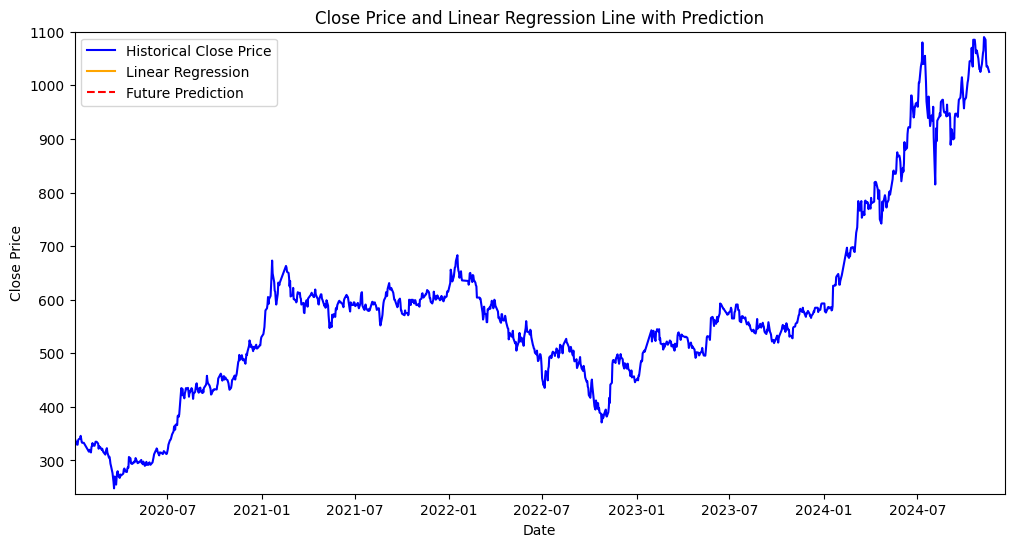

In [7]:
import sqlite3

def linear_regression():
    
    # 連接到 SQLite 資料庫
    conn = sqlite3.connect('check_data.db')

    # 從資料庫讀取資料
    sql = '''SELECT * FROM NewTable'''
    data_from_db = pd.read_sql(sql, conn)

    # 關閉資料庫連接
    conn.close()
    
    # 將索引轉換為日期格式
    data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
    # 將日期轉換為從最早日期起的天數
    data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

    X = data_from_db.iloc[2:-2].select_dtypes(include=[np.number]).drop(columns=['Close'])  # 僅選擇數值型欄位，排除 'Close' # 自變量，移除前2行和後2行
    y = data_from_db['Close'].iloc[2:-2]  # 目標變量，與 X 範圍一致

   
    print(X.dtypes)  # 應該只包含數值型資料
    print("=============")
    print(y.dtypes)  # 應該是數值型

    # 線性回歸模型

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 0,shuffle=False)
    
    std_x = StandardScaler()
    X_train = std_x.fit_transform(X_train)
    X_test = std_x.transform(X_test)
    std_y = StandardScaler()
    y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
    y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    


    
    print(f'Model Score (R²): {lr.score(X_train, y_train):.4f}\nCoeficient: {lr.coef_} \nIntercept: {lr.intercept_}')
    print("=========================================")



    # 確保 X_test 是帶有列名稱的 DataFrame
    X_test = pd.DataFrame(X_test, columns=X.columns)
    X_test_sorted = X_test.sort_index()
    # 提取測試集對應的日期
    test_dates = data_from_db.loc[X_test_sorted .index,'Date']
    
    y_test_pred = lr.predict(X_test_sorted )
    

    # 繪圖
    plt.figure(figsize=(12, 6))
    plt.plot(data_from_db['Date'], data_from_db['Close'], label='Historical Close Price', color='Blue')

    # 使用 model 預測的值
    # 繪製測試集預測結果
    plt.plot(test_dates, y_test_pred, label='Linear Regression', color='orange')

    
    
    
    # 進行預測
    # 未來30天
    future_days = 30

    # 獲取最後一個日期的天數
    last_day = data_from_db['Date'].max()
    # 使用模型進行預測
    # 建立 future_x 為帶列名稱的 DataFrame
    future_x = pd.DataFrame(
    np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1),
    columns=['Days'])
    future_x=future_x.sort_values(by='Days')

    # 填充其他特徵，確保與模型訓練的特徵一致
    for col in ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Days']:
        diff_mean = data_from_db[col].diff().mean()
        if col == 'Days':
            future_x[col] = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + 31)
        else:
            future_x[col] = data_from_db[col].iloc[-1] + (diff_mean if not pd.isna(diff_mean) else 0)
    
    future_x = future_x[X.columns]
    
    #future_x = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1).reshape(-1, 1)
    
    future_x_sorted=future_x.sort_values(by='Days')
    predicted_price = lr.predict(future_x_sorted)

    # 將預測結果轉換為日期格式，從最後一天開始
    future_dates = [last_day + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

    # 顯示預測價格
    plt.plot(future_dates, predicted_price, label='Future Prediction', color='red', linestyle='--')

    plt.xlim(data_from_db['Date'].min(), future_dates[-1])
    plt.ylim(data_from_db['Close'].min() - 10, data_from_db['Close'].max() + 10)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Close Price and Linear Regression Line with Prediction')
    plt.legend()
    plt.show()

linear_regression()



In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
conn = sqlite3.connect('check_data.db')

# 從資料庫讀取資料
sql = '''SELECT * FROM NewTable'''
data_from_db = pd.read_sql(sql, conn)

# 關閉資料庫連接
conn.close()

data_from_db
data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
    # 將日期轉換為從最早日期起的天數
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days
X = data_from_db.iloc[2:-2].select_dtypes(include=[np.number]).drop(columns=['Close'])  # 僅選擇數值型欄位，排除 'Close' # 自變量，移除前2行和後2行
y = data_from_db['Close'].iloc[2:-2]  # 目標變量，與 X 範圍一致


In [26]:

target = data_from_db.iloc[3, -2]

In [27]:
n = 9
chi = SelectKBest(chi2, k=n)
arrchi = chi.fit_transform(data_from_db, target)
arrchi

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
import sqlite3
from sklearn.feature_selection import f_regression

# 連接資料庫並讀取資料
conn = sqlite3.connect('check_data.db')
sql = '''SELECT * FROM NewTable'''
data_from_db = pd.read_sql(sql, conn)
conn.close()

# 將日期轉換為 datetime 並計算天數
data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

# 自變量 X：選擇數值型欄位，排除 'Close'
X = data_from_db.iloc[1:-2].select_dtypes(include=[np.number]).drop(columns=['Close'])

# 目標變量 y：對應於 X 範圍內的 'Close'
y = data_from_db['Close'].iloc[1:-2]

# 確保 X 和 y 的行數一致
assert X.shape[0] == y.shape[0], "X 和 y 的行數不匹配"

# 使用 SelectKBest 進行特徵選擇
n = 9
chi = SelectKBest(f_regression, k=n)

# 將 X 和 y 傳入 SelectKBest
arrchi = chi.fit_transform(X, y)

# 輸出結果
print(arrchi)


[[3.44000000e+02 3.45000000e+02 3.35500000e+02 3.06882202e+02
  4.18112680e+07 1.00000000e+00]
 [3.33000000e+02 3.34500000e+02 3.32000000e+02 3.00102692e+02
  4.53430570e+07 4.00000000e+00]
 [3.32500000e+02 3.33000000e+02 3.26500000e+02 2.97842957e+02
  5.08791810e+07 5.00000000e+00]
 ...
 [1.06000000e+03 1.06500000e+03 1.05000000e+03 1.05000000e+03
  5.10998480e+07 1.77600000e+03]
 [1.04500000e+03 1.05000000e+03 1.03500000e+03 1.03500000e+03
  4.23312320e+07 1.77700000e+03]
 [1.03000000e+03 1.04000000e+03 1.02500000e+03 1.03500000e+03
  4.46279400e+07 1.77800000e+03]]


c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=6. All the features will be returned.
  warnings.warn(


In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import sqlite3

# 連接資料庫並讀取資料
conn = sqlite3.connect('check_data.db')
sql = '''SELECT * FROM NewTable'''
data_from_db = pd.read_sql(sql, conn)
conn.close()

# 將日期轉換為 datetime 並計算天數
data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

# 自變量 X：選擇數值型欄位，排除 'Close'
X = data_from_db.iloc[1:-2].select_dtypes(include=[np.number]).drop(columns=['Close'])

# 目標變量 y：對應於 X 範圍內的 'Close'
y = data_from_db['Close'].iloc[1:-2]

# 確保 X 和 y 的行數一致
assert X.shape[0] == y.shape[0], "X 和 y 的行數不匹配"

# 使用 SelectKBest 進行特徵選擇（f_regression）
n = 9
chi = SelectKBest(f_regression, k=n)
arrchi = chi.fit_transform(X, y)

# 輸出結果
print(arrchi)

score = chi.scores_
scoresort = np.argsort(score)
print(f'1: {scoresort}')
scoresort = np.flipud(scoresort)
print(f'2: {scoresort}')

col = data_from_db.columns
print('選擇的特徵：')
for i in range(n):
  print('{}：{}'.format(col[scoresort[i]], score[scoresort[i]]))

[[3.44000000e+02 3.45000000e+02 3.35500000e+02 3.06882202e+02
  4.18112680e+07 1.00000000e+00]
 [3.33000000e+02 3.34500000e+02 3.32000000e+02 3.00102692e+02
  4.53430570e+07 4.00000000e+00]
 [3.32500000e+02 3.33000000e+02 3.26500000e+02 2.97842957e+02
  5.08791810e+07 5.00000000e+00]
 ...
 [1.06000000e+03 1.06500000e+03 1.05000000e+03 1.05000000e+03
  5.10998480e+07 1.77600000e+03]
 [1.04500000e+03 1.05000000e+03 1.03500000e+03 1.03500000e+03
  4.23312320e+07 1.77700000e+03]
 [1.03000000e+03 1.04000000e+03 1.02500000e+03 1.03500000e+03
  4.46279400e+07 1.77800000e+03]]


c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=6. All the features will be returned.
  warnings.warn(


In [32]:
score = chi.scores_
scoresort = np.argsort(score)
print(f'1: {scoresort}')
scoresort = np.flipud(scoresort)
print(f'2: {scoresort}')

col = data_from_db.columns
print('選擇的特徵：')
for i in range(n):
  print('{}：{}'.format(col[scoresort[i]], score[scoresort[i]]))

array([8.26759058e+05, 1.79944794e+06, 1.61651136e+06, 3.18675163e+05,
       2.22667975e+00, 1.30880584e+03])

In [33]:
scoresort = np.argsort(score)
print(f'1: {scoresort}')
scoresort = np.flipud(scoresort)
print(f'2: {scoresort}')

col = data_from_db.columns
print('選擇的特徵：')
for i in range(n):
  print('{}：{}'.format(col[scoresort[i]], score[scoresort[i]]))

1: [4 5 3 0 2 1]
2: [1 2 0 3 5 4]


In [34]:
col = data_from_db.columns
print('選擇的特徵：')
for i in range(n):
  print('{}：{}'.format(col[scoresort[i]], score[scoresort[i]]))
  

選擇的特徵：
Date：1799447.9378867985
Open：1616511.3632024652
id：826759.0579190544
High：318675.1632750555
Adj Close：1308.805839161675
Low：2.226679745688387


IndexError: index 6 is out of bounds for axis 0 with size 6

In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import sqlite3

# 連接資料庫並讀取資料
conn = sqlite3.connect('check_data.db')
sql = '''SELECT * FROM NewTable'''
data_from_db = pd.read_sql(sql, conn)
conn.close()

# 將日期轉換為 datetime 並計算天數
data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

# 自變量 X：選擇數值型欄位，排除 'Close' 和 'id'
# 自變量 X：選擇數值型欄位，排除 'Close' 和 'id'（若 'id' 是數值型）
#X = data_from_db.iloc[1:-2].select_dtypes(include=[np.number]).drop(columns=['Close', 'id'], errors='ignore')
# 在選擇數值型欄位之前，先刪除 'id' 和 'Close'
X = data_from_db.iloc[1:-2].drop(columns=['Close', 'id'], errors='ignore').select_dtypes(include=[np.number])


# 目標變量 y：對應於 X 範圍內的 'Close'
y = data_from_db['Close'].iloc[1:-2]

# 確保 X 和 y 的行數一致
assert X.shape[0] == y.shape[0], "X 和 y 的行數不匹配"

# 使用 SelectKBest 進行特徵選擇（f_regression）
n = 5  # 更新為剩餘特徵數
chi = SelectKBest(f_regression, k=n)
arrchi = chi.fit_transform(X, y)

# 輸出結果
print(arrchi)

score = chi.scores_
scoresort = np.argsort(score)
print(f'1: {scoresort}')
scoresort = np.flipud(scoresort)
print(f'2: {scoresort}')

col = X.columns  # 更新為特徵名稱來自 X 的列名
print('選擇的特徵：')
for i in range(n):
  print('{}：{}'.format(col[scoresort[i]], score[scoresort[i]]))


[[3.44000000e+02 3.45000000e+02 3.35500000e+02 3.06882202e+02
  1.00000000e+00]
 [3.33000000e+02 3.34500000e+02 3.32000000e+02 3.00102692e+02
  4.00000000e+00]
 [3.32500000e+02 3.33000000e+02 3.26500000e+02 2.97842957e+02
  5.00000000e+00]
 ...
 [1.06000000e+03 1.06500000e+03 1.05000000e+03 1.05000000e+03
  1.77600000e+03]
 [1.04500000e+03 1.05000000e+03 1.03500000e+03 1.03500000e+03
  1.77700000e+03]
 [1.03000000e+03 1.04000000e+03 1.02500000e+03 1.03500000e+03
  1.77800000e+03]]
1: [4 5 3 0 2 1]
2: [1 2 0 3 5 4]
選擇的特徵：
High：1799447.9378867985
Low：1616511.3632024652
Open：826759.0579190544
Adj Close：318675.1632750555
Days：1308.805839161675


Open         float64
High         float64
Low          float64
Adj Close    float64
Volume         int64
Days           int64
dtype: object
float64
Model Score (R²): 0.9998
Coeficient: [[-0.0126835   0.23960753  0.18049309  0.61377872 -0.00102104 -0.03961981]] 
Intercept: [1.18498457e-16]
Close        1.000000
High         0.999672
Low          0.999635
Open         0.999286
Adj Close    0.998151
Days         0.724677
Volume      -0.043156
Name: Close, dtype: float64


c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\user\miniconda3\envs\venv1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


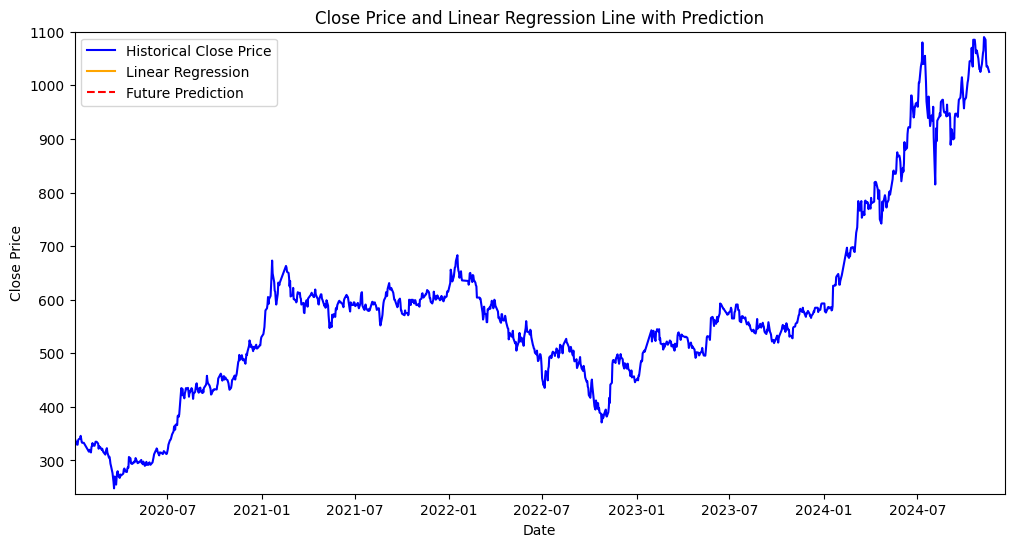

In [44]:
import sqlite3
from sklearn.linear_model import Ridge

def linear_regression():
    
    # 連接到 SQLite 資料庫
    conn = sqlite3.connect('check_data.db')

    # 從資料庫讀取資料
    sql = '''SELECT * FROM NewTable'''
    data_from_db = pd.read_sql(sql, conn)

    # 關閉資料庫連接
    conn.close()
    
    # 將索引轉換為日期格式
    data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
    # 將日期轉換為從最早日期起的天數
    data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

    X = data_from_db.iloc[2:-2].select_dtypes(include=[np.number]).drop(columns=['Close'])  # 僅選擇數值型欄位，排除 'Close' # 自變量，移除前2行和後2行
    y = data_from_db['Close'].iloc[2:-2]  # 目標變量，與 X 範圍一致

   
    print(X.dtypes)  # 應該只包含數值型資料
    print("=============")
    print(y.dtypes)  # 應該是數值型

    # 線性回歸模型

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 0,shuffle=False)
    
    std_x = StandardScaler()
    X_train = std_x.fit_transform(X_train)
    X_test = std_x.transform(X_test)
    std_y = StandardScaler()
    y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
    y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
    lr = Ridge(alpha=0.5)
    lr.fit(X_train, y_train)
    correlations = data_from_db.iloc[2:-2].select_dtypes(include=[np.number]).corr()
    relevant_features = correlations['Close'].sort_values(ascending=False)

    
    print(f'Model Score (R²): {lr.score(X_train, y_train):.4f}\nCoeficient: {lr.coef_} \nIntercept: {lr.intercept_}')
    print("=========================================")
    print(relevant_features)
    print("==========================")


    # 確保 X_test 是帶有列名稱的 DataFrame
    X_test = pd.DataFrame(X_test, columns=X.columns)
    X_test_sorted = X_test.sort_index()
    # 提取測試集對應的日期
    test_dates = data_from_db.loc[X_test_sorted .index,'Date']
    
    y_test_pred = lr.predict(X_test_sorted )

    

    # 繪圖
    plt.figure(figsize=(12, 6))
    plt.plot(data_from_db['Date'], data_from_db['Close'], label='Historical Close Price', color='Blue')

    # 使用 model 預測的值
    # 繪製測試集預測結果
    plt.plot(test_dates, y_test_pred, label='Linear Regression', color='orange')
    
    # 進行預測
    # 未來30天
    future_days = 30

    # 獲取最後一個日期的天數
    last_day = data_from_db['Date'].max()
    # 使用模型進行預測
    # 建立 future_x 為帶列名稱的 DataFrame
    future_x = pd.DataFrame(
    np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1),
    columns=['Days'])
    future_x=future_x.sort_values(by='Days')

    # 填充其他特徵，確保與模型訓練的特徵一致
    for col in ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Days']:
        diff_mean = data_from_db[col].diff().mean()
        if col == 'Days':
            future_x[col] = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + 31)
        else:
            future_x[col] = data_from_db[col].iloc[-1] + (diff_mean if not pd.isna(diff_mean) else 0)
    
    future_x = future_x[X.columns]
    
    #future_x = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1).reshape(-1, 1)
    
    future_x_sorted=future_x.sort_values(by='Days')
    predicted_price = lr.predict(future_x_sorted)

    # 將預測結果轉換為日期格式，從最後一天開始
    future_dates = [last_day + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

    # 顯示預測價格
    plt.plot(future_dates, predicted_price, label='Future Prediction', color='red', linestyle='--')

    plt.xlim(data_from_db['Date'].min(), future_dates[-1])
    plt.ylim(data_from_db['Close'].min() - 10, data_from_db['Close'].max() + 10)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Close Price and Linear Regression Line with Prediction')
    plt.legend()
    plt.show()

linear_regression()


In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
import requests
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

[*********************100%***********************]  1 of 1 completed

Price      Ticker 
Adj Close  2317.TW    float64
High       2317.TW    float64
Low        2317.TW    float64
Open       2317.TW    float64
Volume     2317.TW      int64
Days                    int64
dtype: object
Ticker
2317.TW    float64
dtype: object
Model Score (R²): 0.9843
Coeficient: [[ 1.02755067e-01  6.39634360e-01  8.33634583e-01 -5.52283614e-01
   2.09099782e-09 -1.68293465e-03]] 
Intercept: [-1.11136061]
Model Score (R²): 0.9987
Mean Squared Error: 2.332541545253653


KeyError: "None of [MultiIndex([('Adj Close', '2317.TW'),\n            (     'High', '2317.TW'),\n            (      'Low', '2317.TW'),\n            (     'Open', '2317.TW'),\n            (   'Volume', '2317.TW'),\n            (     'Days',        '')],\n           names=['Price', 'Ticker'])] are in the [columns]"

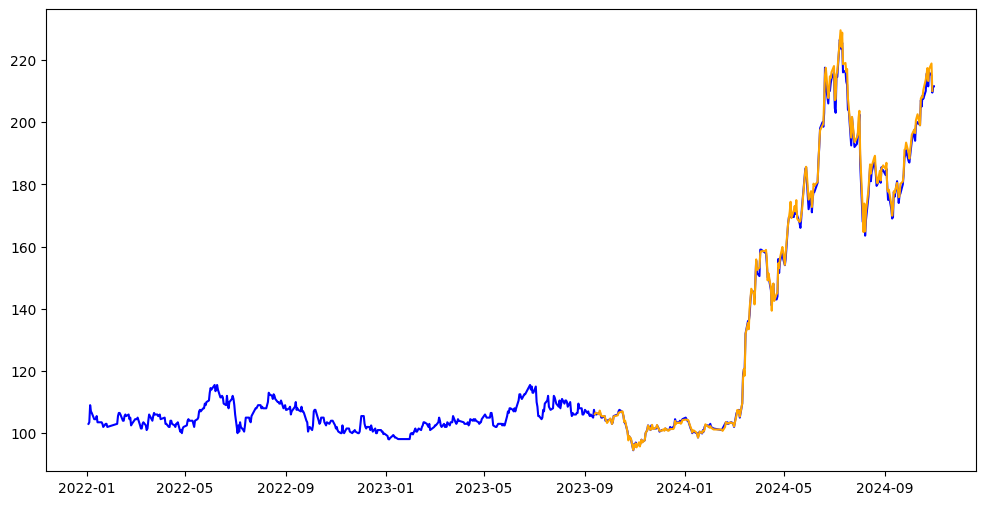

In [56]:
# 讀取歷史數據
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2024, 11, 1)
data_from_db = yf.download('2317.TW', start=start, end=end)

# 將索引轉換為日期格式
data_from_db['Date'] = pd.to_datetime(data_from_db.index)
# 將日期轉換為從最早日期起的天數
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

X = data_from_db[['Days']]  # 自變量
y = data_from_db['Close']  # 目標變量
data_from_db['Date'] = pd.to_datetime(data_from_db['Date'])
    # 將日期轉換為從最早日期起的天數
data_from_db['Days'] = (data_from_db['Date'] - data_from_db['Date'].min()).dt.days

X = data_from_db.iloc[2:-2].select_dtypes(include=[np.number]).drop(columns=['Close'])  # 僅選擇數值型欄位，排除 'Close' # 自變量，移除前2行和後2行
y = data_from_db['Close'].iloc[2:-2]  # 目標變量，與 X 範圍一致
    
   
print(X.dtypes)  # 應該只包含數值型資料
print("=============")
print(y.dtypes)  # 應該是數值型

    # 線性回歸模型

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 0,shuffle=False)
model = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=1)
model.fit(X_train, y_train)
model_score = model.score(X_train, y_train)
b = model.intercept_
a = model.coef_

    
print(f'Model Score (R²): {model_score:.4f}\nCoeficient: {a} \nIntercept: {b}')
print("=========================================")
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Model Score (R²): {r2:.4f}\nMean Squared Error: {mse}')
print("=========================================")


# if not X_test.empty:
# try:
# test_dates = data_from_db.loc[X_test.index, :].index
# print(test_dates[:5])
# except Exception as e:
# print(f"Error calculating test_dates: {e}")
# else:
# print("X_test is empty, cannot calculate test_dates.")


# 確保 X_test 是帶有列名稱的 DataFrame
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test_sorted = X_test.sort_index()
# 提取測試集對應的日期
test_dates = data_from_db.loc[X_test_sorted .index,'Date']

y_test_pred = model.predict(X_test_sorted )


# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(data_from_db['Date'], data_from_db['Close'], label='Historical Close Price', color='Blue')

# 使用 model 預測的值
# 繪製測試集預測結果
plt.plot(test_dates, y_test_pred, label='Linear Regression', color='orange')

#plt.scatter(test_dates, y_test_pred, label='Linear Regression', color='orange')


# 進行預測
# 未來30天
future_days = 30

# 獲取最後一個日期的天數
last_day = data_from_db['Date'].max()
# 使用模型進行預測
# 建立 future_x 為帶列名稱的 DataFrame
future_x = pd.DataFrame(
np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1),
columns=['Days'])
future_x=future_x.sort_values(by='Days')

# 填充其他特徵，確保與模型訓練的特徵一致
for col in ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Days']:
    diff_mean = data_from_db[col].diff().mean()
if col == 'Days':
    future_x[col] = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + 31)
else:
    future_x[col] = data_from_db[col].iloc[-1] + (diff_mean if not pd.isna(diff_mean) else 0)
    
future_x = future_x[X.columns]
    
#future_x = np.arange(data_from_db['Days'].max() + 1, data_from_db['Days'].max() + future_days + 1).reshape(-1, 1)

future_x_sorted=future_x.sort_values(by='Days')
predicted_price = model.predict(future_x_sorted)

    # 將預測結果轉換為日期格式，從最後一天開始
future_dates = [last_day + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

    # 顯示預測價格
plt.plot(future_dates, predicted_price, label='Future Prediction', color='red', linestyle='--')

plt.xlim(data_from_db['Date'].min(), future_dates[-1])
plt.ylim(data_from_db['Close'].min() - 10, data_from_db['Close'].max() + 10)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price and Linear Regression Line with Prediction')
plt.legend()
plt.show()
